In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sn
%matplotlib notebook
from sklearn import preprocessing
from sklearn.utils import shuffle


In [2]:
def get_data():
    #Load the row data from the file 
    data = pd.read_csv('../data/Africa_Vectors_database_1898-2016.csv', sep = ',', encoding = "ISO-8859-1")
    
    # remove white spaces at the begining and end of column names and labels in the columns
    Region = 'GAUL_Admin2'
    data.columns = data.columns.str.strip()
    data['Country']= data['Country'].str.strip()
    data[Region]= data[Region].str.strip()
    data['Adults/Larvae']= data['Adults/Larvae'].str.strip()

    # convert the 3 columns to Upper case
    data['Country'] = data['Country'].str.upper()
    data[Region] = data[Region].str.upper()
    data['Adults/Larvae'] = data['Adults/Larvae'].str.upper()

    #change the column name of Full_Name to Region
    data = data.rename(columns={Region: 'Region'})

    #Taking the mean over the two years, round is to make sure we do not have decimals in years 
    data['Year'] = list(round(data[['YeStart', 'YeEnd']].mean(axis=1)))

    #Selecting the features to keep
    features =['Country','Region', 'Lat', 'Long','Year', 'An gambiae_complex', 'An gambiae ss', 'SS M Form (An colluzzi or Mopti forms)', 'SS S Form (savanah or Bamako forms)','An arabiensis','An. melas','An. merus','An bwambae','An funestus  s.l','An funestus s.s. (specified)','An rivulorum','An leesoni','An parensis','An vaneedeni','An nili s.l','An moucheti s.l','An pharoensis','An hancocki','An mascarensis','An marshalli','An squamous','An wellcomei','An rufipes','An coustani s.l','An ziemanni','An paludis','Adults/Larvae']

    #Returning a dataset with only the features kept
    featured_data= data[features]

    #remove records with Lat,Long missing values 
    featured_data = featured_data.dropna(axis=0, subset=['Lat'])

    #encoding the species classes 
    encoded_data = featured_data.replace(np.nan,0).replace('Y',1)

    # Reseting the  index
    encoded_data=encoded_data.reset_index(drop=True)

    #encoding the labels columns 
    # Label encoding for Country, Region, and  Adults/Larvae columns 
    le = preprocessing.LabelEncoder()
    encoded_data['Country'] = le.fit_transform(encoded_data['Country'])
    encoded_data['Adults/Larvae'] = le.fit_transform(encoded_data['Adults/Larvae'])
    encoded_data['Region'] = le.fit_transform(encoded_data['Region'].astype(str))
    
    #normalize the data
    #encoded_data=(encoded_data-encoded_data.mean())/encoded_data.std()

    
    #normalize the longitude and latitude 
#     encoded_data['Lat']=(encoded_data['Lat']-encoded_data['Lat'].mean())/encoded_data['Lat'].std()
#     encoded_data['Long']=(encoded_data['Long']-encoded_data['Long'].mean())/encoded_data['Long'].std()
#     encoded_data['Year']=(encoded_data['Year']-encoded_data['Year'].mean())/encoded_data['Year'].std()
      
    #feature scaling for year, longitude and latitude 
    encoded_data['Lat']=(encoded_data['Lat']-encoded_data['Lat'].min())/encoded_data['Lat'].max()
    encoded_data['Long']=(encoded_data['Long']-encoded_data['Long'].min())/encoded_data['Long'].max()
    encoded_data['Year']=(encoded_data['Year']-encoded_data['Year'].min())/encoded_data['Year'].max()

    #convert the year column from float to int 
    #data = data.astype({'Year':'int'})
    encoded_data = shuffle(encoded_data)

    return encoded_data

In [3]:
get_data()

,Country,Region,Lat,Long,Year,An gambiae_complex,An gambiae ss,SS M Form (An colluzzi or Mopti forms),SS S Form (savanah or Bamako forms),An arabiensis,...,An hancocki,An mascarensis,An marshalli,An squamous,An wellcomei,An rufipes,An coustani s.l,An ziemanni,An paludis,Adults/Larvae
5957,22,1088,1.547359,1.170959,0.036706,1,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
6837,24,148,0.694035,1.420029,0.054563,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5856,22,341,1.543622,1.161648,0.048115,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4778,18,2128,2.158837,0.216273,0.037698,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1050,3,783,2.105486,0.496230,0.052083,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
10167,35,1962,2.193141,0.208051,0.056548,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6437,23,1824,1.857238,0.293078,0.029266,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7762,24,155,0.867160,1.428525,0.028274,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
12561,44,448,1.586911,1.077523,0.047619,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6737,24,115,0.615301,1.394672,0.028274,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [134]:
data = pd.read_csv('./data/Africa_Vectors_database_1898-2016.csv', sep = ',', encoding = "ISO-8859-1")

In [135]:
#Visualising the data
data.head()


,Country,GAUL_Admin1,GAUL_Admin2,Full_Name,Lat,Long,LatLong_Source,YeStart,YeEnd,An gambiae_complex,...,An rufipes,An coustani s.l,An ziemanni,An paludis,Adults/Larvae,Sampling_Methods,Species_Identification,Other sib species names,Other Anopheline species,Source_Title
0,ANGOLA,Bengo,Dande,BARRA DO DANDE,-8.4730,13.3620,Encarta,1967,1967,Y,...,NaN,NaN,NaN,NaN,"ADULTS, LARVAE","HLC, HBC, LC",M,NaN,NaN,Ribeiro H & Ramos HC (1975). Research on the m...
1,ANGOLA,Bengo,Dande,BOA VISTA,-8.5990,13.5660,Encarta,1987,1987,Y,...,NaN,NaN,NaN,NaN,"ADULTS, LARVAE","PSC, LC",M,NaN,NaN,Ramos L (1988). Memorandum sent to Director Ge...
2,ANGOLA,Bengo,Dande,CABUNGO,-8.5667,13.5000,Other,2002,2002,Y,...,NaN,NaN,NaN,NaN,ADULTS,"IR, Bednet traps","M, PCR",NaN,NaN,"Calzetta M, Santolamazza F, Carrara GC, Cani P..."
3,ANGOLA,Bengo,Dande,LIFUNE,-8.4000,13.4490,Encarta,1970,1970,NaN,...,NaN,Y,Y,NaN,"ADULTS, LARVAE","HLC, ABC, LC",M,NaN,NaN,Ribeiro H & Ramos HC (1975). Research on the m...
4,ANGOLA,Bengo,Dembos,DEMBOS,-8.5156,14.5189,Google Earth,1940,1940,Y,...,NaN,NaN,NaN,NaN,UNKNOWN,Unknown,M,NaN,NaN,De Mesquita B (1942). Consideraes sobre o im...


In [136]:
#Informations on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 41 columns):
Country                                   13464 non-null object
GAUL_Admin1                               13364 non-null object
GAUL_Admin2                               13075 non-null object
Full_Name                                 13464 non-null object
Lat                                       13330 non-null float64
Long                                      13330 non-null float64
LatLong_Source                            13331 non-null object
YeStart                                   13464 non-null int64
YeEnd                                     13464 non-null int64
An gambiae_complex                        11596 non-null object
An gambiae ss                             3990 non-null object
SS M Form (An colluzzi or Mopti forms)    1331 non-null object
SS S Form (savanah or Bamako forms)       1575 non-null object
An arabiensis                             3648 non-null object

In [137]:
#Example of column with missing values to treat
data['Lat'][190:200]

190    -8.6850
191    -8.4240
192    -9.1380
193    -9.0798
194        NaN
195        NaN
196   -10.9410
197    -9.2660
198    -9.8980
199    -9.6610
Name: Lat, dtype: float64

In [138]:
#Selecting the features to keep
List=['Country','Full_Name', 'Lat', 'Long','YeStart','YeEnd', 'An gambiae_complex', 'An gambiae ss', 'SS M Form (An colluzzi or Mopti forms)', 'SS S Form (savanah or Bamako forms)','An arabiensis','An. melas','An. merus','An bwambae','An funestus  s.l','An funestus s.s. (specified)','An rivulorum','An leesoni','An parensis','An vaneedeni','An nili s.l','An moucheti s.l','An pharoensis','An hancocki','An mascarensis','An marshalli','An squamous','An wellcomei','An rufipes','An coustani s.l','An ziemanni ','An paludis ','Adults/Larvae']

In [139]:
#Returning a dataset with only the features kept
New_data= data[List]

In [140]:
#Taking the mean over the two years, round is to make sure we do not have decimals in years 
mylist = list(round(New_data[['YeStart', 'YeEnd']].mean(axis=1)))
mylist = np.array(mylist).reshape(-1,1)

#We then replace the year start with those values
New_data['YeStart'] = mylist

/Users/alghali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [141]:
# We rename year start by year
New_data.columns = ['year' if x=='YeStart' else x for x in New_data.columns]

In [142]:
#we remove year end
New_data=New_data.drop('YeEnd',1)

In [143]:
New_data

,Country,Full_Name,Lat,Long,year,An gambiae_complex,An gambiae ss,SS M Form (An colluzzi or Mopti forms),SS S Form (savanah or Bamako forms),An arabiensis,...,An hancocki,An mascarensis,An marshalli,An squamous,An wellcomei,An rufipes,An coustani s.l,An ziemanni,An paludis,Adults/Larvae
0,ANGOLA,BARRA DO DANDE,-8.4730,13.3620,1967.0,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ADULTS, LARVAE"
1,ANGOLA,BOA VISTA,-8.5990,13.5660,1987.0,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ADULTS, LARVAE"
2,ANGOLA,CABUNGO,-8.5667,13.5000,2002.0,Y,Y,NaN,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADULTS
3,ANGOLA,LIFUNE,-8.4000,13.4490,1970.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,"ADULTS, LARVAE"
4,ANGOLA,DEMBOS,-8.5156,14.5189,1940.0,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN
5,ANGOLA,BOM JESUS,-9.1660,13.5660,1954.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,ADULTS
6,ANGOLA,ICOLO E BENGO,-9.2500,13.7333,1940.0,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN
7,ANGOLA,KILUNDA,-8.9268,13.5878,2002.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADULTS
8,ANGOLA,LAGOA BANDA,-8.8503,13.5842,1965.0,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,"ADULTS, LARVAE"
9,ANGOLA,MAZOZO,-9.1020,13.6220,1970.0,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,"ADULTS, LARVAE"


In [144]:
# Taking the sum over the number of missing values in  latitute
New_data['Lat'].isnull().sum()
 

134

In [145]:
# Taking the sum over the number of missing values in  longitude
New_data['Long'].isnull().sum()

134

In [146]:
#Removing the rows on the dataset where we have missing values of geolocations
New_data = New_data.dropna(axis=0, subset=['Lat'])

In [147]:
#Informations on the new dataset
New_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13330 entries, 0 to 13463
Data columns (total 32 columns):
Country                                   13330 non-null object
Full_Name                                 13330 non-null object
Lat                                       13330 non-null float64
Long                                      13330 non-null float64
year                                      13330 non-null float64
An gambiae_complex                        11493 non-null object
An gambiae ss                             3988 non-null object
SS M Form (An colluzzi or Mopti forms)    1331 non-null object
SS S Form (savanah or Bamako forms)       1574 non-null object
An arabiensis                             3635 non-null object
An. melas                                 538 non-null object
An. merus                                 253 non-null object
An bwambae                                26 non-null object
An funestus  s.l                          5052 non-null object
An f

In [148]:
#Replace all Absence of species with 0 and presence of species with 1
encoded_data = New_data.replace(np.nan,0).replace('Y',1)
encoded_data

,Country,Full_Name,Lat,Long,year,An gambiae_complex,An gambiae ss,SS M Form (An colluzzi or Mopti forms),SS S Form (savanah or Bamako forms),An arabiensis,...,An hancocki,An mascarensis,An marshalli,An squamous,An wellcomei,An rufipes,An coustani s.l,An ziemanni,An paludis,Adults/Larvae
0,ANGOLA,BARRA DO DANDE,-8.4730,13.3620,1967.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"ADULTS, LARVAE"
1,ANGOLA,BOA VISTA,-8.5990,13.5660,1987.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"ADULTS, LARVAE"
2,ANGOLA,CABUNGO,-8.5667,13.5000,2002.0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,ADULTS
3,ANGOLA,LIFUNE,-8.4000,13.4490,1970.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,"ADULTS, LARVAE"
4,ANGOLA,DEMBOS,-8.5156,14.5189,1940.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNKNOWN
5,ANGOLA,BOM JESUS,-9.1660,13.5660,1954.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,ADULTS
6,ANGOLA,ICOLO E BENGO,-9.2500,13.7333,1940.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNKNOWN
7,ANGOLA,KILUNDA,-8.9268,13.5878,2002.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ADULTS
8,ANGOLA,LAGOA BANDA,-8.8503,13.5842,1965.0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,"ADULTS, LARVAE"
9,ANGOLA,MAZOZO,-9.1020,13.6220,1970.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,"ADULTS, LARVAE"


In [150]:
# Label encoding for Country, Full_Name, and  Adults/Larvae columns 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_data['Country'] = le.fit_transform(encoded_data['Country'])
encoded_data['Adults/Larvae'] = le.fit_transform(encoded_data['Adults/Larvae'])
encoded_data['Full_Name'] = le.fit_transform(encoded_data['Full_Name'])

encoded_data

,Country,Full_Name,Lat,Long,year,An gambiae_complex,An gambiae ss,SS M Form (An colluzzi or Mopti forms),SS S Form (savanah or Bamako forms),An arabiensis,...,An hancocki,An mascarensis,An marshalli,An squamous,An wellcomei,An rufipes,An coustani s.l,An ziemanni,An paludis,Adults/Larvae
0,0,1731,-8.4730,13.3620,1967.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,2130,-8.5990,13.5660,1987.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,2614,-8.5667,13.5000,2002.0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,7092,-8.4000,13.4490,1970.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
4,0,3314,-8.5156,14.5189,1940.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
5,0,2205,-9.1660,13.5660,1954.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
6,0,5030,-9.2500,13.7333,1940.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
7,0,6195,-8.9268,13.5878,2002.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,6885,-8.8503,13.5842,1965.0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
9,0,8140,-9.1020,13.6220,1970.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [128]:
# Reseting the  index
encoded_data=encoded_data.reset_index(drop=True)

In [129]:
# Removing extra spaces on the heading
encoded_data.rename(columns=lambda x: x.strip())

,Country,Full_Name,Lat,Long,year,An gambiae_complex,An gambiae ss,SS M Form (An colluzzi or Mopti forms),SS S Form (savanah or Bamako forms),An arabiensis,...,An hancocki,An mascarensis,An marshalli,An squamous,An wellcomei,An rufipes,An coustani s.l,An ziemanni,An paludis,Adults/Larvae
0,ANGOLA,BARRA DO DANDE,-8.4730,13.3620,1967.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"ADULTS, LARVAE"
1,ANGOLA,BOA VISTA,-8.5990,13.5660,1987.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"ADULTS, LARVAE"
2,ANGOLA,CABUNGO,-8.5667,13.5000,2002.0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,ADULTS
3,ANGOLA,LIFUNE,-8.4000,13.4490,1970.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,"ADULTS, LARVAE"
4,ANGOLA,DEMBOS,-8.5156,14.5189,1940.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNKNOWN
5,ANGOLA,BOM JESUS,-9.1660,13.5660,1954.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,ADULTS
6,ANGOLA,ICOLO E BENGO,-9.2500,13.7333,1940.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNKNOWN
7,ANGOLA,KILUNDA,-8.9268,13.5878,2002.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ADULTS
8,ANGOLA,LAGOA BANDA,-8.8503,13.5842,1965.0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,"ADULTS, LARVAE"
9,ANGOLA,MAZOZO,-9.1020,13.6220,1970.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,"ADULTS, LARVAE"


In [28]:
# Droping the life cycle stage
# encoded_data=encoded_data.drop('Adults/Larvae',1)

In [29]:
# Data ready to be used
encoded_data

,Country,Full_Name,Lat,Long,year,An gambiae_complex,An gambiae ss,SS M Form (An colluzzi or Mopti forms),SS S Form (savanah or Bamako forms),An arabiensis,...,An pharoensis,An hancocki,An mascarensis,An marshalli,An squamous,An wellcomei,An rufipes,An coustani s.l,An ziemanni,An paludis
0,Angola,Barra do Dande,-8.4730,13.3620,1967.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Angola,Boa Vista,-8.5990,13.5660,1987.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Angola,Cabungo,-8.5667,13.5000,2002.0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Angola,Lifune,-8.4000,13.4490,1970.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,Angola,Dembos,-8.5156,14.5189,1940.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Angola,Bom Jesus,-9.1660,13.5660,1954.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6,Angola,Icolo e Bengo,-9.2500,13.7333,1940.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Angola,Kilunda,-8.9268,13.5878,2002.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Angola,Lagoa Banda,-8.8503,13.5842,1965.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9,Angola,Mazozo,-9.1020,13.6220,1970.0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [32]:
#idx = np.array(data.index)

In [33]:
#len(idx)

In [34]:
#data.iloc[:10,:10]

In [35]:
#data.iloc[:10,10:20]

In [36]:
#data.iloc[:10,20:30]

In [37]:
#data.iloc[:10,30:]

In [38]:
#len(data.columns[9:34])
#species_columns = data.columns[9:34]
#data.iloc[:,9:34]

In [39]:
#Replace all Absence of species with 0 and presence of species with 1
coded_data = data[data.columns[9:34]].replace(np.nan,0).replace('Y',1)
coded_data

,An gambiae_complex,An gambiae ss,SS M Form (An colluzzi or Mopti forms),SS S Form (savanah or Bamako forms),An arabiensis,An. melas,An. merus,An bwambae,An funestus s.l,An funestus s.s. (specified),...,An moucheti s.l,An pharoensis,An hancocki,An mascarensis,An marshalli,An squamous,An wellcomei,An rufipes,An coustani s.l,An ziemanni
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
6,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [14]:
#Plot a graph of Longitude against Latitude to show dominance of Species
#for i in range(len(species_columns)):
#colors = np.arange(0,len(species_columns),1)

In [40]:
#colors
coded_data.loc[50]

An gambiae_complex                        1
An gambiae ss                             0
SS M Form (An colluzzi or Mopti forms)    0
SS S Form (savanah or Bamako forms)       0
An arabiensis                             0
An. melas                                 0
An. merus                                 0
An bwambae                                0
An funestus  s.l                          0
An funestus s.s. (specified)              0
An rivulorum                              0
An leesoni                                0
An parensis                               0
An vaneedeni                              0
An nili s.l                               0
An moucheti s.l                           0
An pharoensis                             0
An hancocki                               0
An mascarensis                            0
An marshalli                              0
An squamous                               0
An wellcomei                              0
An rufipes                      

<IPython.core.display.Javascript object>


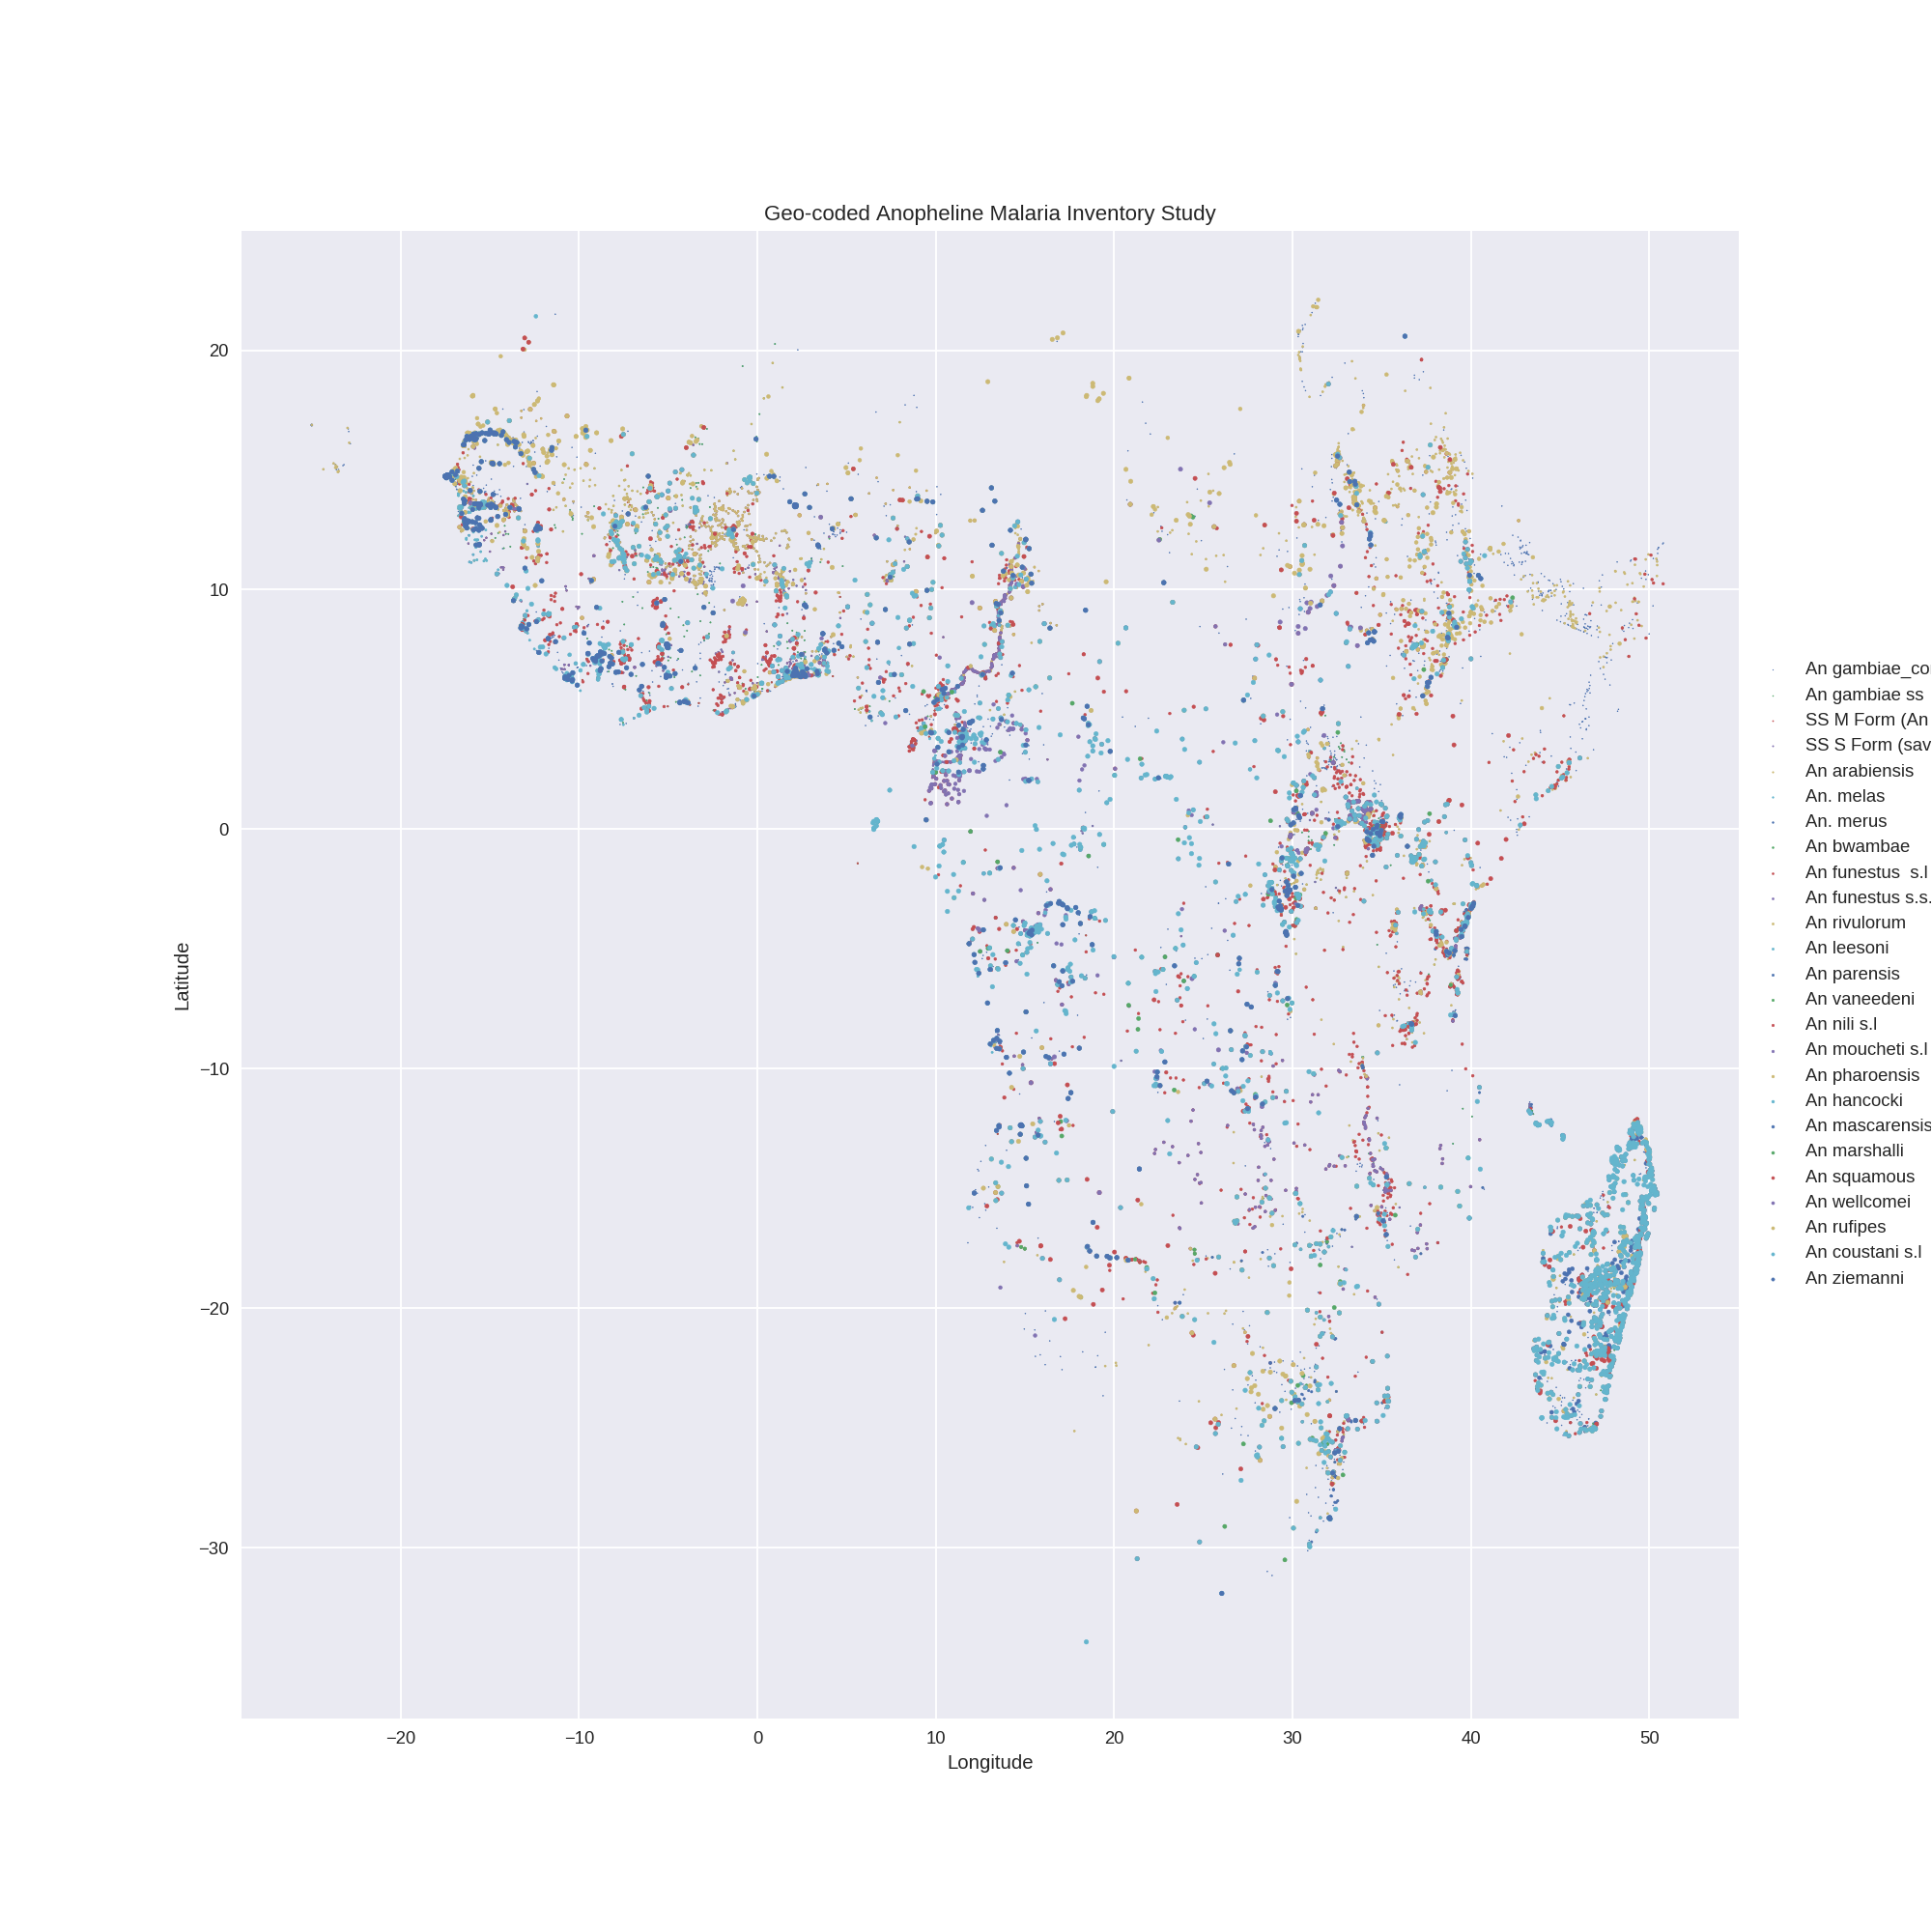

In [41]:
plt.figure(figsize=(15,15))
c = 0
for i in range(1,(len(coded_data.columns) + 1)):    
    c = i * coded_data.iloc[:,i - 1]
    plt.scatter(data.Long, data.Lat, c , marker = '.', label = coded_data.columns[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geo-coded Anopheline Malaria Inventory Study')

In [59]:
count = 1
print(len(data.iloc[:,0].unique()),' African Countries are being studied')
print('\n')
for country in (data.iloc[:,0].unique()):
    #print('Countries considered are: ',le
    print(count,' ',country)
    count += 1

48  African Countries are being studied


1   Angola
2   Benin
3   Botswana
4   Burkina Faso
5   Burundi
6   Cameroon
7   Cape Verde
8   Central African Republic
9   Chad
10   Comoros
11   Congo
12   Cte d'Ivoire
13   Democratic Republic of the Congo
14   Djibouti
15   Equatorial Guinea
16   Eritrea
17   Ethiopia
18   Gabon
19   Gambia
20   Ghana
21   Guinea
22   Guinea Bissau
23   Kenya
24   Liberia
25   Madagascar
26   Malawi
27   Mali
28   Mauritania
29   Mayotte
30   Mozambique
31   Namibia
32   Niger
33   Nigeria
34   Rwanda
35   Sao Tome and Principe
36   Senegal
37   Sierra Leone
38   Somalia
39   South Africa
40   South Sudan
41   Sudan
42   Swaziland
43   Tanzania
44   Togo
45   Uganda
46   Zambia
47   Zanzibar
48   Zimbabwe


In [65]:
grouped = data.groupby('Country')

In [66]:
grouped